<a href="https://colab.research.google.com/github/SANTHOSH-SR8245/AIML/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dataset=pd.read_csv("/content/Project 1 - Weather Dataset.csv")


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [ ]:
dataset

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [ ]:
# Function to map into 6 categories (Clear, Rain, Snow, Thunderstorm, Fog, Other)
def simplify_weather(condition):
    condition = condition.lower()
    if "fog" in condition:   # check Fog first
        return "Fog"
    elif "clear" in condition or "cloudy" in condition or "haze" in condition:
        return "Clear"
    elif "rain" in condition or "drizzle" in condition:
        return "Rain"
    elif "snow" in condition:
        return "Snow"
    elif "thunderstorm" in condition:
        return "Thunderstorm"
    else:
        return "Other"

# Apply mapping
dataset["Weather_Category"] = dataset["Weather"].apply(simplify_weather)

# Check counts
print(dataset["Weather_Category"].value_counts())

Weather_Category
Clear           7258
Rain             616
Snow             482
Fog              426
Thunderstorm       2
Name: count, dtype: int64


In [ ]:
dataset.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather',
       'Weather_Category'],
      dtype='object')

In [ ]:
ind=dataset[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%','Wind Speed_km/h', 'Visibility_km', 'Press_kPa',]]

In [ ]:
dep=dataset[["Weather_Category"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.20, random_state=42)

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cls=classification_report(y_test, y_pred)

In [ ]:
print(cls)

              precision    recall  f1-score   support

       Clear       0.94      0.95      0.95      1443
         Fog       0.85      0.86      0.85        85
        Rain       0.41      0.40      0.41       120
        Snow       0.66      0.61      0.64       109

    accuracy                           0.89      1757
   macro avg       0.72      0.71      0.71      1757
weighted avg       0.88      0.89      0.88      1757



In [ ]:
display(dataset)


Column: Temp_C
Q1 = 0.10, Q3 = 18.80, IQR = 18.70
Lower Bound = -27.95, Upper Bound = 46.85
Number of Outliers = 0


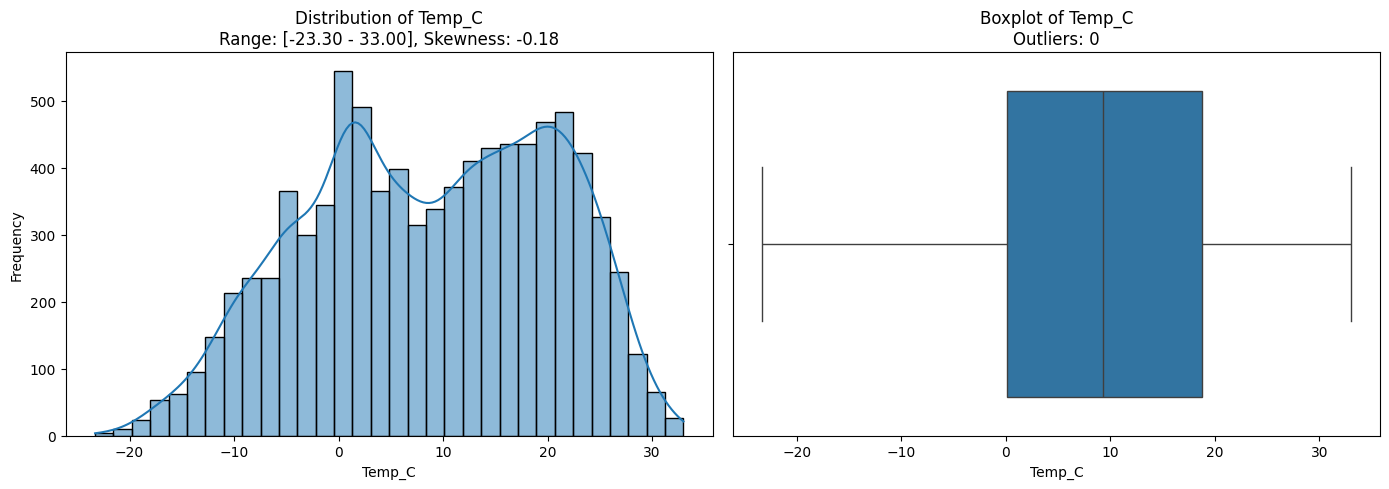


Column: Dew Point Temp_C
Q1 = -5.90, Q3 = 11.80, IQR = 17.70
Lower Bound = -32.45, Upper Bound = 38.35
Number of Outliers = 0


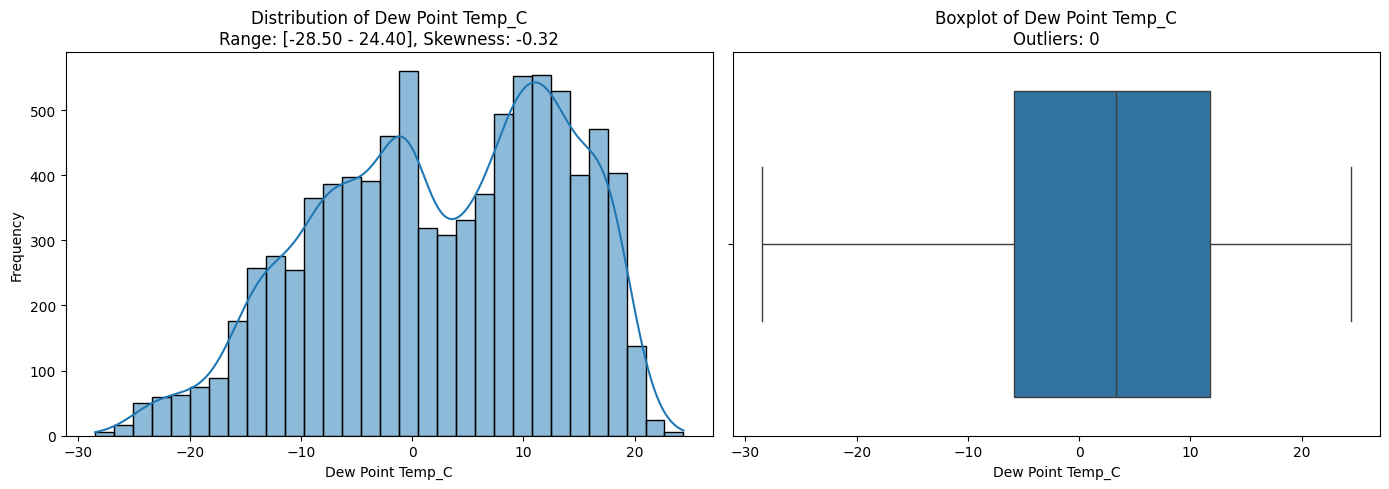


Column: Rel Hum_%
Q1 = 56.00, Q3 = 81.00, IQR = 25.00
Lower Bound = 18.50, Upper Bound = 118.50
Number of Outliers = 2


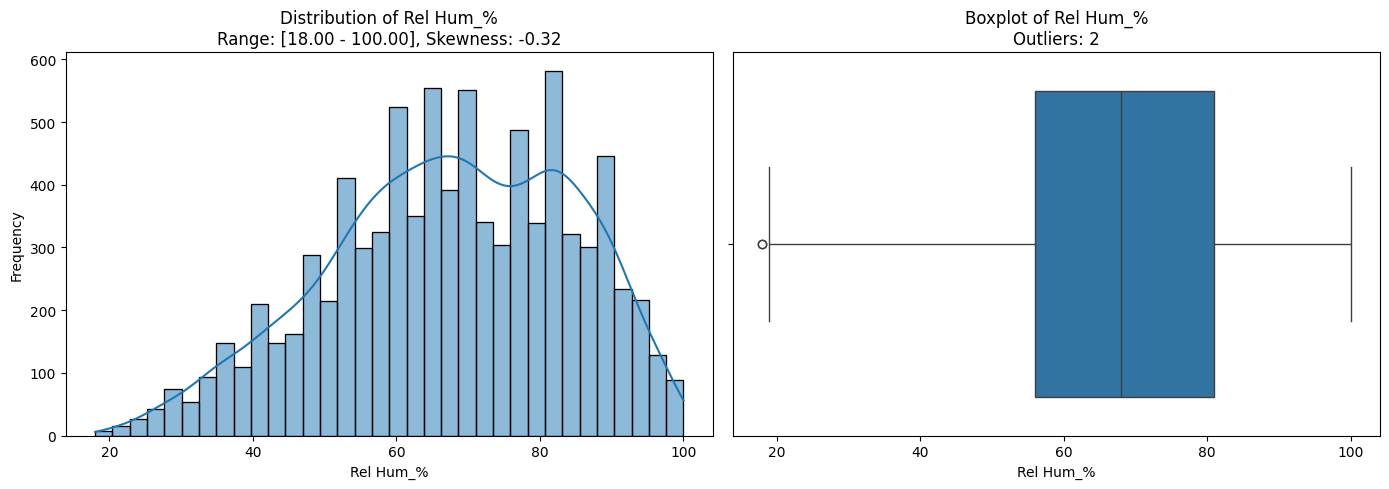


Column: Wind Speed_km/h
Q1 = 9.00, Q3 = 20.00, IQR = 11.00
Lower Bound = -7.50, Upper Bound = 36.50
Number of Outliers = 162


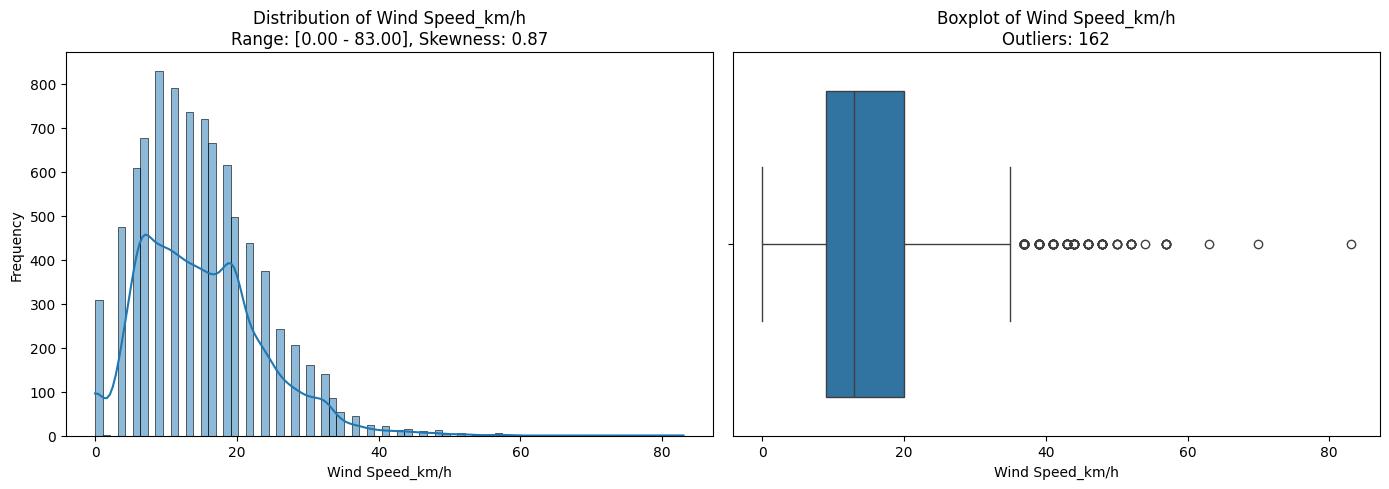


Column: Visibility_km
Q1 = 24.10, Q3 = 25.00, IQR = 0.90
Lower Bound = 22.75, Upper Bound = 26.35
Number of Outliers = 3539


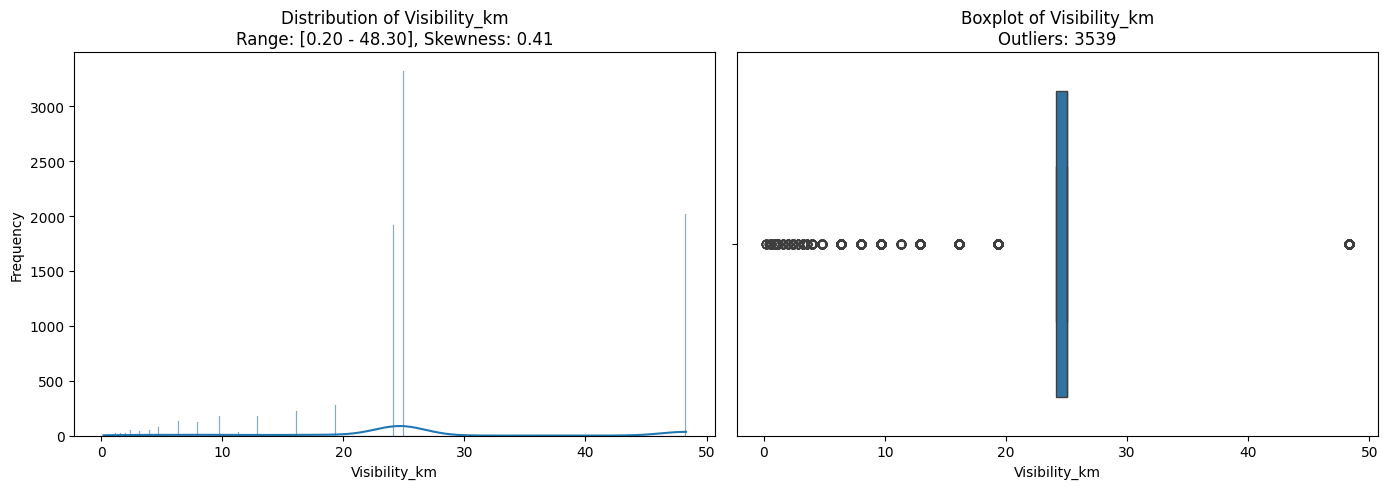


Column: Press_kPa
Q1 = 100.56, Q3 = 101.59, IQR = 1.03
Lower Bound = 99.02, Upper Bound = 103.14
Number of Outliers = 207


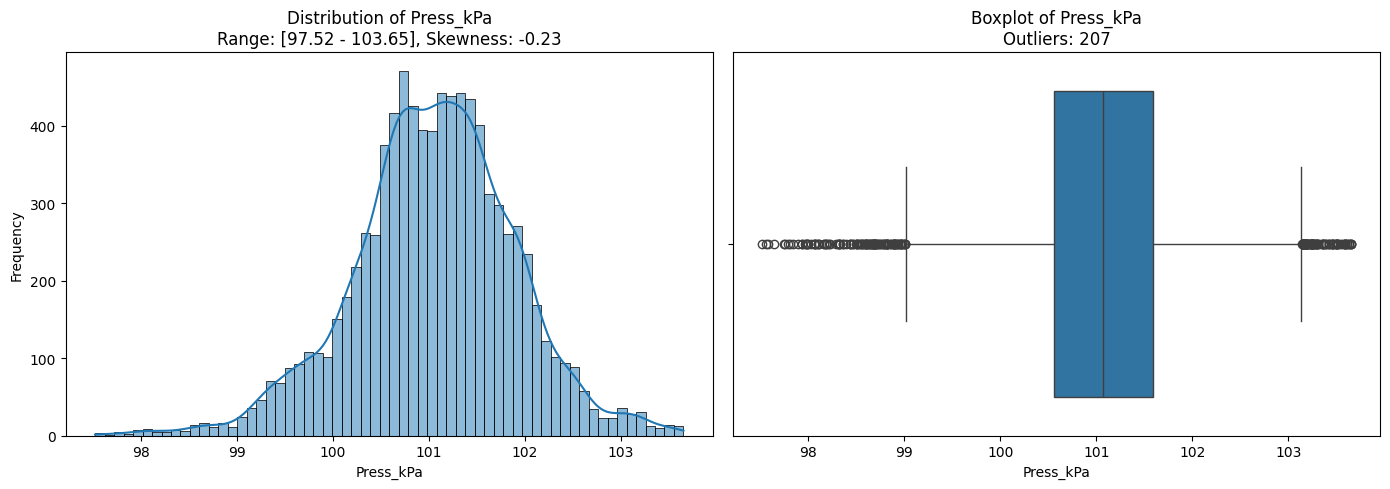

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for plotting
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    # ----- Outlier detection using IQR -----
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)][col]

    print(f"\nColumn: {col}")
    print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")
    print(f"Number of Outliers = {outliers.shape[0]}")

    # ----- Visualization -----
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram with KDE
    sns.histplot(dataset[col], kde=True, ax=axes[0])
    col_range = f"[{dataset[col].min():.2f} - {dataset[col].max():.2f}]"
    skewness = dataset[col].skew()
    axes[0].set_title(f'Distribution of {col}\nRange: {col_range}, Skewness: {skewness:.2f}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Boxplot (highlighting outliers)
    sns.boxplot(x=dataset[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}\nOutliers: {outliers.shape[0]}')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()



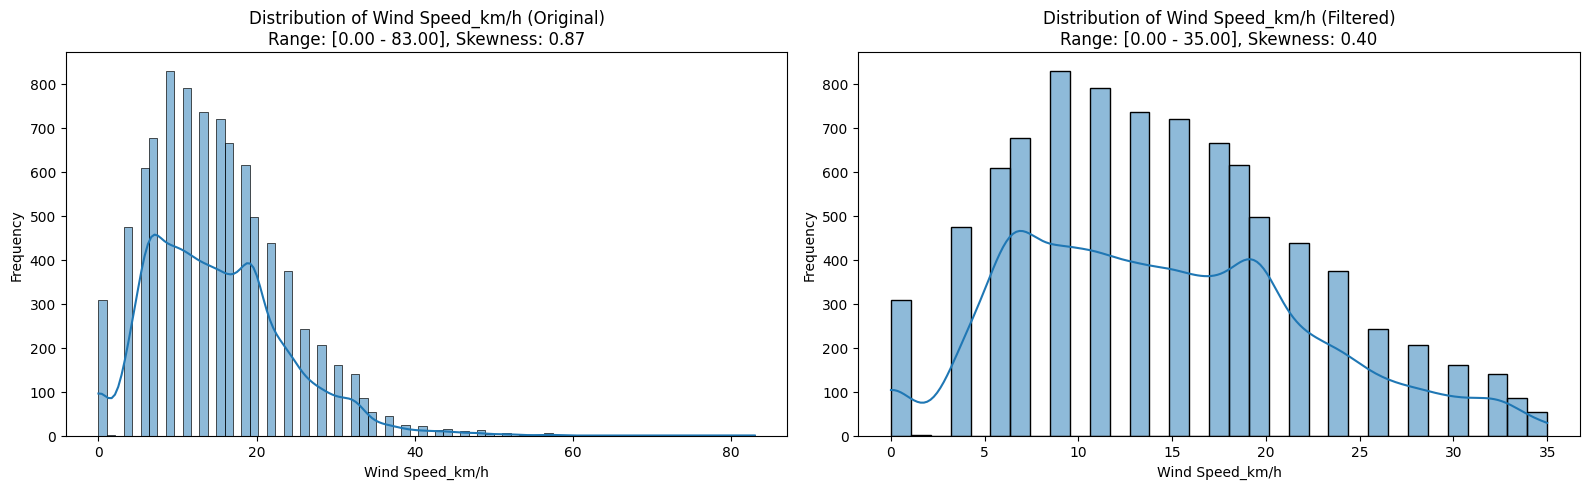

In [ ]:
# Calculate Q1 and Q3 for 'Wind Speed_km/h'
Q1_wind_speed = dataset['Wind Speed_km/h'].quantile(0.25)
Q3_wind_speed = dataset['Wind Speed_km/h'].quantile(0.75)

# Calculate IQR
IQR_wind_speed = Q3_wind_speed - Q1_wind_speed

# Define the lower and upper bounds for outliers
lower_bound_wind_speed = Q1_wind_speed - 1.5 * IQR_wind_speed
upper_bound_wind_speed = Q3_wind_speed + 1.5 * IQR_wind_speed

# Remove outliers from the dataset
dataset_filtered = dataset[(dataset['Wind Speed_km/h'] >= lower_bound_wind_speed) &
                           (dataset['Wind Speed_km/h'] <= upper_bound_wind_speed)]

# Plot the distribution before and after removing outliers
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot before outlier removal
sns.histplot(dataset['Wind Speed_km/h'], kde=True, ax=axes[0])
original_range = f"[{dataset['Wind Speed_km/h'].min():.2f} - {dataset['Wind Speed_km/h'].max():.2f}]"
original_skewness = dataset['Wind Speed_km/h'].skew()
axes[0].set_title(f'Distribution of Wind Speed_km/h (Original)\nRange: {original_range}, Skewness: {original_skewness:.2f}')
axes[0].set_xlabel('Wind Speed_km/h')
axes[0].set_ylabel('Frequency')

# Plot after outlier removal
sns.histplot(dataset_filtered['Wind Speed_km/h'], kde=True, ax=axes[1])
filtered_range = f"[{dataset_filtered['Wind Speed_km/h'].min():.2f} - {dataset_filtered['Wind Speed_km/h'].max():.2f}]"
filtered_skewness = dataset_filtered['Wind Speed_km/h'].skew()
axes[1].set_title(f'Distribution of Wind Speed_km/h (Filtered)\nRange: {filtered_range}, Skewness: {filtered_skewness:.2f}')
axes[1].set_xlabel('Wind Speed_km/h')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


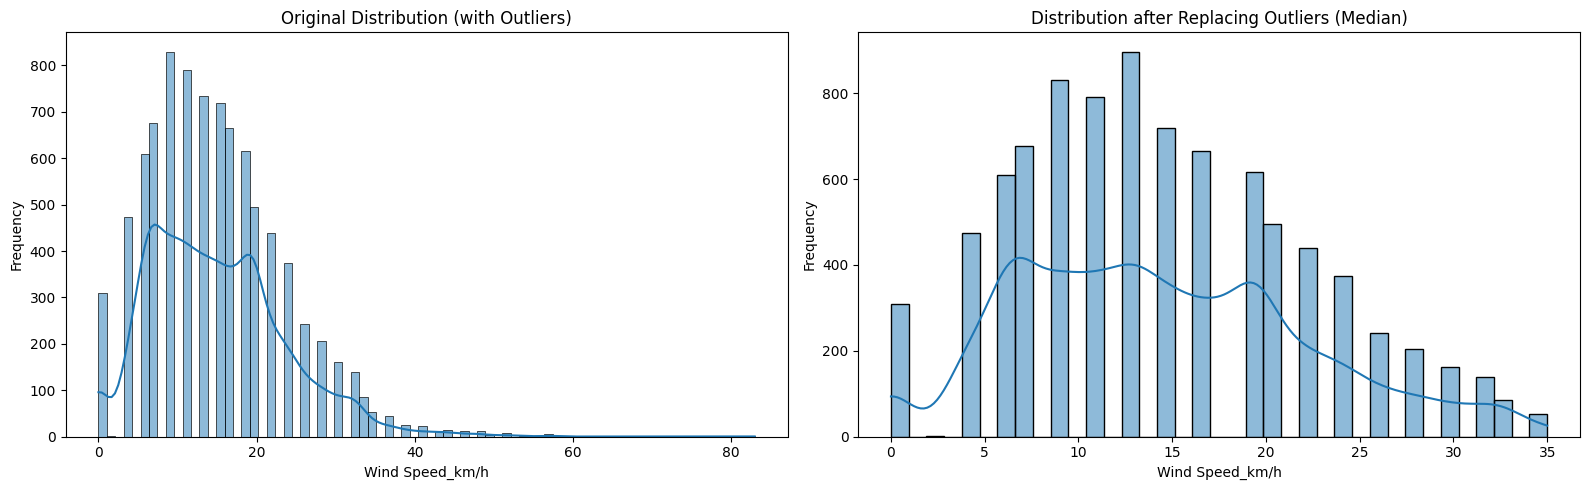

In [ ]:
# Calculate Q1 and Q3
Q1_wind_speed = dataset['Wind Speed_km/h'].quantile(0.25)
Q3_wind_speed = dataset['Wind Speed_km/h'].quantile(0.75)

# Calculate IQR
IQR_wind_speed = Q3_wind_speed - Q1_wind_speed

# Define bounds
lower_bound_wind_speed = Q1_wind_speed - 1.5 * IQR_wind_speed
upper_bound_wind_speed = Q3_wind_speed + 1.5 * IQR_wind_speed

# Median value for replacement
median_wind_speed = dataset['Wind Speed_km/h'].median()

# Replace outliers with median
dataset_replaced = dataset.copy()
dataset_replaced['Wind Speed_km/h'] = dataset_replaced['Wind Speed_km/h'].apply(
    lambda x: median_wind_speed if (x < lower_bound_wind_speed or x > upper_bound_wind_speed) else x
)

# Plot before vs after replacement
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Before replacement
sns.histplot(dataset['Wind Speed_km/h'], kde=True, ax=axes[0])
axes[0].set_title("Original Distribution (with Outliers)")
axes[0].set_xlabel("Wind Speed_km/h")
axes[0].set_ylabel("Frequency")

# After replacement
sns.histplot(dataset_replaced['Wind Speed_km/h'], kde=True, ax=axes[1])
axes[1].set_title("Distribution after Replacing Outliers (Median)")
axes[1].set_xlabel("Wind Speed_km/h")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


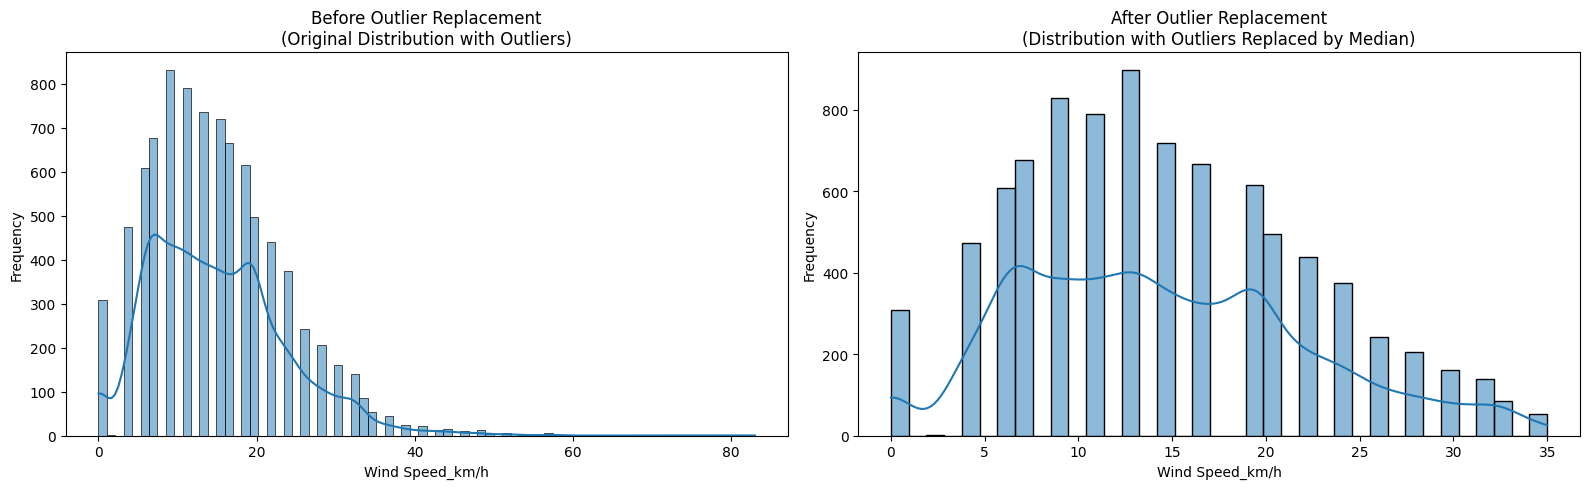

In [ ]:
# Calculate Q1 and Q3
Q1_wind_speed = dataset['Wind Speed_km/h'].quantile(0.25)
Q3_wind_speed = dataset['Wind Speed_km/h'].quantile(0.75)

# Calculate IQR
IQR_wind_speed = Q3_wind_speed - Q1_wind_speed

# Define bounds
lower_bound_wind_speed = Q1_wind_speed - 1.5 * IQR_wind_speed
upper_bound_wind_speed = Q3_wind_speed + 1.5 * IQR_wind_speed

# Median value for replacement
median_wind_speed = dataset['Wind Speed_km/h'].median()

# Replace outliers with median
dataset_replaced = dataset.copy()
dataset_replaced['Wind Speed_km/h'] = dataset_replaced['Wind Speed_km/h'].apply(
    lambda x: median_wind_speed if (x < lower_bound_wind_speed or x > upper_bound_wind_speed) else x
)

# Plot before vs after replacement
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Before replacement
sns.histplot(dataset['Wind Speed_km/h'], kde=True, ax=axes[0])
axes[0].set_title("Before Outlier Replacement\n(Original Distribution with Outliers)")
axes[0].set_xlabel("Wind Speed_km/h")
axes[0].set_ylabel("Frequency")

# After replacement
sns.histplot(dataset_replaced['Wind Speed_km/h'], kde=True, ax=axes[1])
axes[1].set_title("After Outlier Replacement\n(Distribution with Outliers Replaced by Median)")
axes[1].set_xlabel("Wind Speed_km/h")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
# Calculate Q1 and Q3
Q1_wind_speed = dataset['Wind Speed_km/h'].quantile(0.25)
Q3_wind_speed = dataset['Wind Speed_km/h'].quantile(0.75)

# Calculate IQR
IQR_wind_speed = Q3_wind_speed - Q1_wind_speed

# Define bounds
lower_bound_wind_speed = Q1_wind_speed - 1.5 * IQR_wind_speed
upper_bound_wind_speed = Q3_wind_speed + 1.5 * IQR_wind_speed

# Median value for replacement
median_wind_speed = dataset['Wind Speed_km/h'].median()

# Replace outliers with median
dataset_replaced = dataset.copy()
dataset_replaced['Wind Speed_km/h'] = dataset_replaced['Wind Speed_km/h'].apply(
    lambda x: median_wind_speed if (x < lower_bound_wind_speed or x > upper_bound_wind_speed) else x
)

# Plot before vs after replacement
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Before replacement
sns.histplot(dataset['Wind Speed_km/h'], kde=True, ax=axes[0])
axes[0].axvline(lower_bound_wind_speed, color='red', linestyle='--', label=f'Lower Bound = {lower_bound_wind_speed:.2f}')
axes[0].axvline(upper_bound_wind_speed, color='blue', linestyle='--', label=f'Upper Bound = {upper_bound_wind_speed:.2f}')
axes[0].set_title(f"Before Outlier Replacement\nBounds: [{lower_bound_wind_speed:.2f}, {upper_bound_wind_speed:.2f}]")
axes[0].set_xlabel("Wind Speed_km/h")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# After replacement
sns.histplot(dataset_replaced['Wind Speed_km/h'], kde=True, ax=axes[1])
axes[1].axvline(lower_bound_wind_speed, color='red', linestyle='--', label=f'Lower Bound = {lower_bound_wind_speed:.2f}')
axes[1].axvline(upper_bound_wind_speed, color='blue', linestyle='--', label=f'Upper Bound = {upper_bound_wind_speed:.2f}')
axes[1].set_title(f"After Outlier Replacement\nBounds: [{lower_bound_wind_speed:.2f}, {upper_bound_wind_speed:.2f}]")
axes[1].set_xlabel("Wind Speed_km/h")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

# Create a copy for replacing outliers
dataset_replaced = dataset.copy()

for col in numerical_cols:
    # ----- Outlier detection using IQR -----
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Median value for replacement
    median_val = dataset[col].median()

    # Replace outliers with median
    dataset_replaced[col] = dataset_replaced[col].apply(
        lambda x: median_val if (x < lower_bound or x > upper_bound) else x
    )

    # ----- Summary -----
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)][col]
    print(f"\nColumn: {col}")
    print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")
    print(f"Original Outliers = {outliers.shape[0]} replaced with median = {median_val:.2f}")

    # ----- Visualization -----
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Before replacement
    sns.histplot(dataset[col], kde=True, ax=axes[0])
    axes[0].axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound')
    axes[0].axvline(upper_bound, color='blue', linestyle='--', label=f'Upper Bound')
    axes[0].set_title(f"Before Outlier Replacement\n{col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")
    axes[0].legend()

    # After replacement
    sns.histplot(dataset_replaced[col], kde=True, ax=axes[1])
    axes[1].axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound')
    axes[1].axvline(upper_bound, color='blue', linestyle='--', label=f'Upper Bound')
    axes[1].set_title(f"After Outlier Replacement\n{col}")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Frequency")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Now dataset_replaced contains all outliers replaced with median


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

# Create a copy for replacing outliers
dataset_replaced = dataset.copy()

for col in numerical_cols:
    # ----- Outlier detection using IQR -----
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Median value for replacement
    median_val = dataset[col].median()

    # Replace outliers with median
    dataset_replaced[col] = dataset_replaced[col].apply(
        lambda x: median_val if (x < lower_bound or x > upper_bound) else x
    )

    # ----- Summary -----
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)][col]
    print(f"\nColumn: {col}")
    print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")
    print(f"Original Outliers = {outliers.shape[0]} replaced with median = {median_val:.2f}")

    # ----- Visualization -----
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Histogram - Before
    sns.histplot(dataset[col], kde=True, ax=axes[0, 0])
    axes[0, 0].axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound')
    axes[0, 0].axvline(upper_bound, color='blue', linestyle='--', label=f'Upper Bound')
    axes[0, 0].set_title(f"Before Outlier Replacement\nHistogram of {col}")
    axes[0, 0].legend()

    # Histogram - After
    sns.histplot(dataset_replaced[col], kde=True, ax=axes[0, 1])
    axes[0, 1].axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound')
    axes[0, 1].axvline(upper_bound, color='blue', linestyle='--', label=f'Upper Bound')
    axes[0, 1].set_title(f"After Outlier Replacement\nHistogram of {col}")
    axes[0, 1].legend()

    # Boxplot - Before
    sns.boxplot(x=dataset[col], ax=axes[1, 0])
    axes[1, 0].set_title(f"Before Outlier Replacement\nBoxplot of {col}")

    # Boxplot - After
    sns.boxplot(x=dataset_replaced[col], ax=axes[1, 1])
    axes[1, 1].set_title(f"After Outlier Replacement\nBoxplot of {col}")

    plt.tight_layout()
    plt.show()

# Final dataset with replaced outliers
# dataset_replaced


In [ ]:
print(dataset['Wind Speed_km/h'].skew())